In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import random

### load data

In [2]:
data = load_iris()

### قسمت الف

### split data 
#### 80% for train and 20% for test

In [3]:
X =data.data
y = data.target

In [4]:
ratio = 0.8 
total_rows = X.shape[0]
train_size = int(total_rows*ratio) 
X_train = X[0:train_size]
y_train = y[0:train_size]
X_test = X[train_size:]
y_test= y[train_size:]

### توابع

In [5]:
def sigmoid(z):
    sig = 1.0/(1.0+np.exp(-z))
    return sig

In [6]:
def sigmoid_prime(z):
    sig_prime = sigmoid(z)*(1-sigmoid(z))
    return sig_prime

In [7]:
def feedforward(w, a,b):
    a = np.dot(w, a)+b
    return a

In [8]:
def backprop(X, y, w1, w2, b1, b2):
        z = feedforward(w1.T, X, b1)
        a1 = sigmoid(z)

        z1 = feedforward(w2.T, a1, b2)
        a2 = sigmoid(z1)

        error = np.square(y - a2) / 2

        error2 = -(y - a2)
        sp1 = sigmoid_prime(z1)
       

        wg2 = np.dot(a1,(error2 * sp1).T,)
        bg2 = error2 * sp1


        sp = sigmoid_prime(z)
        wg1 = np.dot(X, (sp* np.dot(w2,(sp1 * error2),)  ).T,)
        bg1 =  sp* np.dot(w2,(sp1 * error2),)
        
        return wg1, wg2, bg1, bg2, error

    

### قسمت ب

In [9]:
def train_SGD(X,y, num_epochs, learning_rate):
 
    input_layer = X.shape[1]
    hidden_layer = 10  
    output_layer = 3 
    
    w1 = np.random.uniform(size=(input_layer, hidden_layer))
    w2 = np.random.uniform(size=(hidden_layer, output_layer))
    b1 = np.random.uniform(size=(hidden_layer, 1))
    b2 = np.random.uniform(size=(output_layer, 1))

 
    losses = []
    
    
    for epoch in range(num_epochs):
        for i in range(len(y)):
            random_index = np.random.randint(len(y))
            
           
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            xi =xi.T
            yi=yi.T
          
            wg1,wg2,bg1,bg2,error=backprop(xi,yi,w1, w2, b1, b2)
    
            w2 = w2 - learning_rate * wg2
            w1 = w1 - learning_rate * wg1
            b1 = b1 - learning_rate * bg1
            b2 = b2 - learning_rate * bg2
                 
        
    return w1,w2, b1,b2

In [10]:
w1, w2, b1, b2 = train_SGD(X_train, y_train, 1000, 0.001)

### قسمت ج

In [11]:
def create_batch(X, y, batch_size):
    m = X.shape[0]
    new_data = [i for i in range(1, m) if not i%batch_size]
    x_batch = np.split(X, new_data, axis=0)
    y_batch = np.split(y, new_data, axis=0)
    return x_batch, y_batch

In [12]:
def train_minibatchGD(X, y,num_epochs, learning_rate):
   
    input_layer = X.shape[1] 
    hidden_layer = 10  
    output_layer = 3 
    batch_size = 5
    w1 = np.random.uniform(size=(input_layer, hidden_layer))
    w2 = np.random.uniform(size=(hidden_layer, output_layer))
    b1 = np.random.uniform(size=(hidden_layer, 1))
    b2 = np.random.uniform(size=(output_layer, 1))
    


    iteration = int(np.ceil(len(X) / batch_size))
    for i in range(num_epochs): 
        for batch in range(iteration):
            X_mini, y_mini = create_batch(X, y, batch_size)
            x1= X_mini[batch]
            y1=y_mini[batch]
            x1=x1.T
            y1=y1.T
            
            wg1,wg2,bg1,bg2, error=backprop(x1,y1,w1, w2, b1, b2)
            w2 = w2 - learning_rate * wg2
            w1 = w1 - learning_rate * wg1 
            b1 = b1 - learning_rate * bg1
            b2 = b2 - learning_rate * bg2
             
    return w1, w2, b1, b2

In [13]:
w1, w2, b1, b2 = train_minibatchGD(X_train, y_train, 1000, 0.001)

### قسمت د

In [14]:
def train_GD(X,y, num_epochs, learning_rate):
  
    X = X.T
    y = y.reshape(1, -1)
    input_layer = X.shape[0]  
    hidden_layer = 4 
    output_layer = 3 
    
    w1 = np.random.uniform(size=(input_layer, hidden_layer))
    w2 = np.random.uniform(size=(hidden_layer, output_layer))
    
    b1 = np.random.uniform(size=(hidden_layer, 1))
    b2 = np.random.uniform(size=(output_layer, 1))
    
    losses = []
    
    
    for epoch in range(num_epochs):
        wg1,wg2,bg1,bg2,error=backprop(X,y,w1, w2,b1,b2)
    
        w2 = w2 -  learning_rate * wg2
        w1 = w1 - learning_rate * wg1
        
        b1 = b1 - learning_rate * bg1
        b2 = b2 - learning_rate * bg2
        epoch_loss = np.average(error)
        if epoch % 1000 == 0:
            print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

        losses.append(epoch_loss)       
        
    return w1,w2,b1,b2, losses

In [ ]:
w1, w2,b1,b2,losses = train_GD(X_train, y_train, 10000, 0.01)

Error at epoch 0 is 0.27387
Error at epoch 1000 is 0.08531
Error at epoch 2000 is 0.08429
Error at epoch 3000 is 0.08396


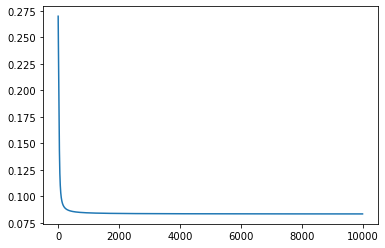

In [16]:
plt.plot(losses)
plt.show()

### قسمت ه

In [17]:
w1, w2, b1,b2,losses = train_GD(X_test, y_test, 10000, 0.01)

Error at epoch 0 is 0.62304
Error at epoch 1000 is 0.50082
Error at epoch 2000 is 0.50041
Error at epoch 3000 is 0.50027
Error at epoch 4000 is 0.50021
Error at epoch 5000 is 0.50016
Error at epoch 6000 is 0.50014
Error at epoch 7000 is 0.50012
Error at epoch 8000 is 0.50010
Error at epoch 9000 is 0.50009


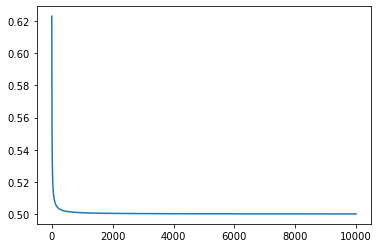

In [18]:
plt.plot(losses)
plt.show()

### قسمت و

In [19]:
def grad_and_numerical_derivative(X,y):
  
    input_layer = X.shape[1] 
    hidden_layer = 10 
    output_layer = 3 
    
    random_index = np.random.randint(len(y))
    xi = X[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    
    xi=xi.T
    yi =yi.T
    
    w1 = np.random.uniform(size=(input_layer, hidden_layer))
    w2 = np.random.uniform(size=(hidden_layer, output_layer))
    b1 = np.random.uniform(size=(hidden_layer, 1))
    b2 = np.random.uniform(size=(output_layer, 1))
      
 
    w1_grad,w2_grad,b1_grad,b2_grad, error=backprop(xi,yi,w1, w2, b1, b2)
    
    l_w2_grad= np.square(yi-sigmoid(np.dot(w2.T+w2_grad.T,(sigmoid(np.dot(w1.T,xi)+b1)))+b2))/2
    

    # (np.square(y-sigmoid(np.dot(w2.T,(sigmoid(np.dot(w1.T,x)+b1)))+b2))/2
    
    epsilon=np.finfo('float').eps
    temp1 =(np.square(yi-sigmoid(np.dot(w2.T+epsilon,(sigmoid(np.dot(w1.T,xi)+b1)))+b2))/2)
    temp2=(np.square(yi-sigmoid(np.dot(w2.T-epsilon,(sigmoid(np.dot(w1.T,xi)+b1)))+b2))/2)
    l_numderivative_w2 = (temp1-temp2/2*epsilon)
   
    
    print('for W2')
    print('numerical derivative')
    print(l_numderivative_w2)
    print('back propagation')
    print(l_w2_grad)
    print('--------------------------')
    
    l_w1_grad= np.square(yi-sigmoid(np.dot(w2.T,(sigmoid(np.dot(w1.T+w1_grad.T,xi)+b1)))+b2))/2
    
    temp1 =(np.square(yi-sigmoid(np.dot(w2.T,(sigmoid(np.dot(w1.T+epsilon,xi)+b1)))+b2))/2)
    temp2=(np.square(yi-sigmoid(np.dot(w2.T,(sigmoid(np.dot(w1.T-epsilon,xi)+b1)))+b2))/2)  
    l_numderivative_w1 = (temp1-temp2/2*epsilon)
    
    print('for W1')
    print('numerical derivative')
    print(l_numderivative_w1)
    print('back propagation')
    print(l_w1_grad)
    print('--------------------------')
    
    l_b2_grad= np.square(yi-sigmoid(np.dot(w2.T,(sigmoid(np.dot(w1.T,xi)+b1)))+b2+b2_grad))/2
    
    temp1 =(np.square(yi-sigmoid(np.dot(w2.T,(sigmoid(np.dot(w1.T,xi)+b1)))+b2+epsilon))/2)
    temp2=(np.square(yi-sigmoid(np.dot(w2.T,(sigmoid(np.dot(w1.T,xi)+b1)))+b2-epsilon))/2)  
    l_numderivative_b2 = (temp1-temp2/2*epsilon)
    
    print('for b2')
    print('numerical derivative')
    print(l_numderivative_b2)
    print('back propagation')
    print(l_b2_grad)
    print('--------------------------')
    
    
    l_b1_grad= np.square(yi-sigmoid(np.dot(w2.T,(sigmoid(np.dot(w1.T,xi)+b1+b1_grad)))+b2))/2
    
    temp1 =(np.square(yi-sigmoid(np.dot(w2.T,(sigmoid(np.dot(w1.T,xi)+b1+epsilon)))+b2))/2)
    temp2=(np.square(yi-sigmoid(np.dot(w2.T,(sigmoid(np.dot(w1.T,xi)+b1-epsilon)))+b2))/2)  
    l_numderivative_b1 = (temp1-temp2/2*epsilon)
    
    print('for b1')
    print('numerical derivative')
    print(l_numderivative_b1)
    print('back propagation')
    print(l_b1_grad)
    


In [20]:
grad_and_numerical_derivative(X_train,y_train)

for W2
numerical derivative
[[4.17461486e-07]
 [1.14941810e-06]
 [1.89929369e-05]]
back propagation
[[4.17468431e-07]
 [1.14947069e-06]
 [1.90071679e-05]]
--------------------------
for W1
numerical derivative
[[4.17461486e-07]
 [1.14941810e-06]
 [1.89929369e-05]]
back propagation
[[4.17461498e-07]
 [1.14941811e-06]
 [1.89929375e-05]]
--------------------------
for b2
numerical derivative
[[4.17461486e-07]
 [1.14941810e-06]
 [1.89929369e-05]]
back propagation
[[4.17462182e-07]
 [1.14942337e-06]
 [1.89943621e-05]]
--------------------------
for b1
numerical derivative
[[4.17461486e-07]
 [1.14941810e-06]
 [1.89929369e-05]]
back propagation
[[4.17461486e-07]
 [1.14941810e-06]
 [1.89929369e-05]]


### قسمت ز

Error at epoch 0 is 0.28486
Error at epoch 1000 is 0.10622
Error at epoch 2000 is 0.10515
Error at epoch 3000 is 0.10481
Error at epoch 4000 is 0.10464
Error at epoch 5000 is 0.10455
Error at epoch 6000 is 0.10448
Error at epoch 7000 is 0.10444
Error at epoch 8000 is 0.10440
Error at epoch 9000 is 0.10438


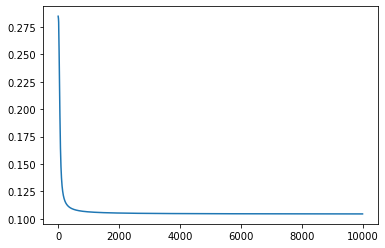

In [21]:
X1_train = X[5:train_size+5]
y1_train = y[5:train_size+5]
w1, w2,b1,b2,losses = train_GD(X1_train, y1_train, 10000, 0.01)
plt.plot(losses)
plt.show()

Error at epoch 0 is 0.28830
Error at epoch 1000 is 0.12614
Error at epoch 2000 is 0.12554
Error at epoch 3000 is 0.12536
Error at epoch 4000 is 0.12526
Error at epoch 5000 is 0.12521
Error at epoch 6000 is 0.12517
Error at epoch 7000 is 0.12515
Error at epoch 8000 is 0.12513
Error at epoch 9000 is 0.12512


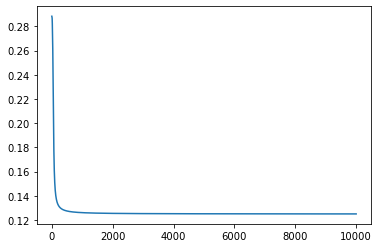

In [22]:
X2_train = X[10:train_size+10]
y2_train = y[10:train_size+10]
w1, w2,b1,b2,losses = train_GD(X2_train, y2_train, 10000, 0.01)
plt.plot(losses)
plt.show()

Error at epoch 0 is 0.29673
Error at epoch 1000 is 0.14828
Error at epoch 2000 is 0.14691
Error at epoch 3000 is 0.14652
Error at epoch 4000 is 0.14633
Error at epoch 5000 is 0.14623
Error at epoch 6000 is 0.14616
Error at epoch 7000 is 0.14611
Error at epoch 8000 is 0.14608
Error at epoch 9000 is 0.14605


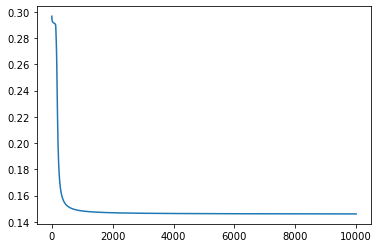

In [23]:
X1_train = X[15:train_size+15]
y1_train = y[15:train_size+15]
w1, w2,b1,b2,losses = train_GD(X1_train, y1_train, 10000, 0.01)
plt.plot(losses)
plt.show()

همان طور که مشاهده میکنیم صرفا باهم تفاوت جزئی دارند.